# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

# 你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

# 然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。
# 所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，
# 你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。
# 或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。
或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [400]:
import pandas as pd
import numpy as np
import math
import json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files

portfolio = pd.read_json('data/portfolio.json', orient='frame', lines=True)
profile = pd.read_json('data/profile.json', orient='frame', lines=True)
transcript = pd.read_json('data/transcript.json', orient='frame', lines=True)

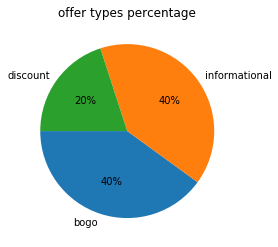

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

In [444]:
#portfolio.rename(columns={'id':'value'},inplace=True)
portfolio
#id (string) – 推送的id
#offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
#difficulty (int) – 满足推送的要求所需的最少花费
#reward (int) – 满足推送的要求后给与的优惠
#duration (int) – 推送持续的时间，单位是天
#channels (字符串列表)

df_por_stat=portfolio.groupby('offer_type').count()

fig=plt.figure()
labels=portfolio.offer_type.unique().tolist()
values=df_por_stat['id'].tolist()

plt.pie(values,labels=labels,startangle=180,shadow=False,autopct='%1.0f%%')
plt.title('offer types percentage')
plt.show()
portfolio

In [377]:
df_por_stat=portfolio.groupby('offer_type').count()
df_por_stat['id'].tolist()
portfolio.offer_type.unique().tolist()

['bogo', 'informational', 'discount']

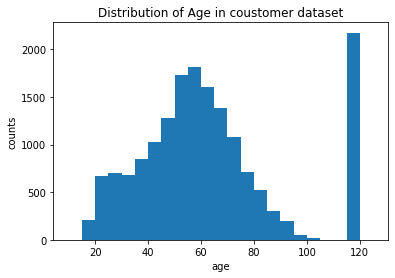

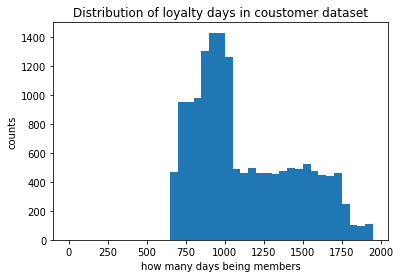

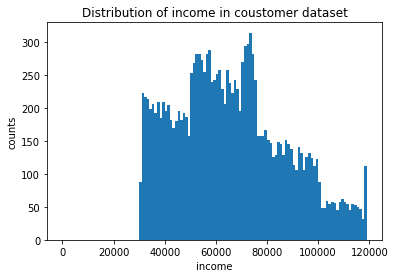

age became_member_on    income loyalty_day
count  17000.0          17000.0   14825.0     17000.0
mean      62.5       20167034.2   65405.0      1193.4
std       26.7          11677.5   21598.3       411.2
min       18.0       20130729.0   30000.0       676.0
25%       45.0       20160526.0   49000.0       884.0
50%       58.0       20170802.0   64000.0      1034.0
75%       73.0       20171230.0   80000.0      1467.0
max      118.0       20180726.0  120000.0      2499.0

In [416]:
#profile.json
profile.rename(columns={'id':'person'},inplace=True)
start_date=datetime.strptime('2020/06/01', '%Y/%m/%d')
def str_list(x):
    b=str(x[0])+str(x[1])+str(x[2])+str(x[3])+'/'+str(x[4])+str(x[5])+'/'+str(x[6])+str(x[7])
    return b
profile['loyalty_day']=profile['became_member_on'].apply(lambda x: str_list('a'.join(str(x)).split('a'))).apply(lambda x: str(start_date-datetime.strptime(x,'%Y/%m/%d')).split(' ')[0])
profile['loyalty_day']=profile['loyalty_day'].apply(lambda x:int(x))


y=profile.age.tolist()
fig=plt.figure()
ax=fig.add_subplot()
ax.hist(y,bins=np.arange(10,130,5))
plt.xlabel('age')
plt.ylabel('counts')
plt.title('Distribution of Age in coustomer dataset')

fig1=plt.figure()
y1=profile.loyalty_day.tolist()
ax1=fig1.add_subplot()
ax1.hist(y1,bins=np.arange(0,2000,50))
plt.xlabel('how many days being members')
plt.ylabel('counts')
plt.title('Distribution of loyalty days in coustomer dataset')
plt.show()

fig2=plt.figure()
y2=profile.income.tolist()
ax2=fig2.add_subplot()
ax2.hist(y2,bins=np.arange(0,120000,1000))
plt.xlabel('income')
plt.ylabel('counts')
plt.title('Distribution of income in coustomer dataset')
plt.show()

format = lambda x:'%.1f' % x
profile.describe().applymap(format)


In [424]:
len(np.where(profile['age']>110)[0])
profile.shape[0]==len(profile.person.unique())

True

In [432]:
profile['age_error']=np.where(profile['age']>110,np.nan,1)
profile=profile.dropna(axis=0)
profile

/Users/huatongyan/anaconda3/envs/pipework/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


gender  age                            person  became_member_on  \
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
5          M   68  e2127556f4f64592b11af22de27a7932          20180426   
8          M   65  389bc3fa690240e798340f5a15918d5c          20180209   
12         M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  loyalty_day  age_error  
1      112000.0         1052        1.0  
3      100000.0         1119        1.0  
5       70000.0          767        1.0  
8       53000.0          843        1.0  
12      51000.0          933        1.0  
...         ...          ...        ...  
16995   54000.0          728        1.0  
16996   72000.0          689        1.0  
16997   73000.0         1222        1.0  
16998   50000.0         1547        1.0  
16999   82000.0         1045        1.0  

[14825 rows x 7 columns]

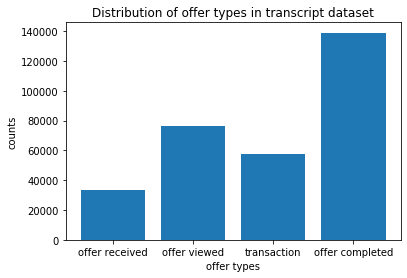

person            event  \
12658   9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  offer completed   
12672   fe97aa22dd3e48c8b143116a8403dd52  offer completed   
12679   629fc02d56414d91bca360decdfa9288  offer completed   
12692   676506bad68e4161b9bbaffeb039626b  offer completed   
12697   8f7dd3b2afe14c078eb4f6e6fe4ba97d  offer completed   
...                                  ...              ...   
306475  0c027f5f34dd4b9eba0a25785c611273  offer completed   
306497  a6f84f4e976f44508c358cc9aba6d2b3  offer completed   
306506  b895c57e8cd047a8872ce02aa54759d6  offer completed   
306509  8431c16f8e1d440880db371a68f82dd0  offer completed   
306527  24f56b5e1849462093931b164eb803b5  offer completed   

                                                    value  time  
12658   {'offer_id': '2906b810c7d4411798c6938adc9daaa5...     0  
12672   {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...     0  
12679   {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...     0  
12692   {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...     0  
12697   {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...     0  
...                                                   ...   ...  
306475  {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   714  
306497  {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   714  
306506  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  
306509  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  
306527  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  

[33579 rows x 4 columns]

In [443]:
df_tg=transcript.groupby('event')[['person']].count()
x=transcript.event.unique().tolist()
y=df_tg.person.tolist()
fig3=plt.figure()
ax3=plt.bar(x,y)
plt.xlabel('offer types')
plt.ylabel('counts')
plt.title('Distribution of offer types in transcript dataset')
plt.show()
transcript[transcript['event']=='offer completed']

In [442]:
#filter the user group: 看了消费劵且在有效期内消费了
viewed_event=transcript[transcript['event']=='offer viewed']
viewed_event['id']=viewed_event[viewed_event['event']=='offer viewed']['value'].apply(lambda x: str(list(x.values())[0]))
viewed_merge=pd.merge(portfolio,viewed_event,how='right',on='id')
viewed_person=viewed_merge[['person']]

buy_event=transcript[transcript['event']=='transaction']
person_view_buy=pd.merge(viewed_merge,buy_event,how='outer',on='person')

person_view_buy=person_view_buy.dropna()

a=np.where(person_view_buy['time_x']<person_view_buy['time_y'],1,np.nan)
person_view_buy['valid_time']=a
#person_view_buy.shape#(493586, 13)
person_view_buy=person_view_buy.dropna()#shape：(207952, 14)
person_view_buy['amount']=person_view_buy['value_y'].apply(lambda x: str(list(x.values())[0]))
person_view_buy=person_view_buy.drop(['value_x','value_y'],axis=1)

#总共看了消息的事件：278,459
person_view_buy.shape[0]
#有效期限内看了消息的事件：92,513
len(np.where(person_view_buy['duration']*24>person_view_buy['time_x'])[0])

#有效期限内看到且产生消费的事件：19,211;这里filter出来了这些事件的表
#len(np.where(person_view_buy['duration']*24>person_view_buy['time_y'])[0])
b=np.where(person_view_buy['duration']*24>person_view_buy['time_y'],1,np.nan)
person_view_buy['see_intime_buy']=b
person_view_buy=person_view_buy.dropna()

person_view_buy

/Users/huatongyan/anaconda3/envs/pipework/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


reward                 channels  difficulty  duration offer_type  \
1         10.0  [email, mobile, social]        10.0       7.0       bogo   
2         10.0  [email, mobile, social]        10.0       7.0       bogo   
3         10.0  [email, mobile, social]        10.0       7.0       bogo   
4         10.0  [email, mobile, social]        10.0       7.0       bogo   
5         10.0  [email, mobile, social]        10.0       7.0       bogo   
...        ...                      ...         ...       ...        ...   
494666     2.0     [web, email, mobile]        10.0       7.0   discount   
494667     2.0     [web, email, mobile]        10.0       7.0   discount   
494668     2.0     [web, email, mobile]        10.0       7.0   discount   
494674     2.0     [web, email, mobile]        10.0       7.0   discount   
494676     2.0     [web, email, mobile]        10.0       7.0   discount   

                                      id                            person  \
1       ae264e3637204a6fb9bb56bc8210ddfd  02c083884c7d45b39cc68e1314fec56c   
2       ae264e3637204a6fb9bb56bc8210ddfd  02c083884c7d45b39cc68e1314fec56c   
3       ae264e3637204a6fb9bb56bc8210ddfd  02c083884c7d45b39cc68e1314fec56c   
4       ae264e3637204a6fb9bb56bc8210ddfd  02c083884c7d45b39cc68e1314fec56c   
5       ae264e3637204a6fb9bb56bc8210ddfd  02c083884c7d45b39cc68e1314fec56c   
...                                  ...                               ...   
494666  2906b810c7d4411798c6938adc9daaa5  b4e06068cce54e3d9c3c55ad6f0e5065   
494667  2906b810c7d4411798c6938adc9daaa5  b4e06068cce54e3d9c3c55ad6f0e5065   
494668  2906b810c7d4411798c6938adc9daaa5  b4e06068cce54e3d9c3c55ad6f0e5065   
494674  2906b810c7d4411798c6938adc9daaa5  93599a777bc34536a4703b63493a0ea6   
494676  2906b810c7d4411798c6938adc9daaa5  15953663abf54181adf1fd4c39442b85   

             event_x  time_x      event_y  time_y  valid_time  \
1       offer viewed     0.0  transaction     6.0         1.0   
2       offer viewed     0.0  transaction    12.0         1.0   
3       offer viewed     0.0  transaction    84.0         1.0   
4       offer viewed     0.0  transaction    90.0         1.0   
5       offer viewed     0.0  transaction   102.0         1.0   
...              ...     ...          ...     ...         ...   
494666  offer viewed    54.0  transaction    90.0         1.0   
494667  offer viewed    54.0  transaction   108.0         1.0   
494668  offer viewed    54.0  transaction   150.0         1.0   
494674  offer viewed    78.0  transaction   156.0         1.0   
494676  offer viewed   102.0  transaction   120.0         1.0   

                    amount  see_intime_buy  
1                     1.44             1.0  
2       4.5600000000000005             1.0  
3                     1.53             1.0  
4                      0.5             1.0  
5                      9.8             1.0  
...                    ...             ...  
494666                7.24             1.0  
494667                 1.0             1.0  
494668                1.56             1.0  
494674                2.69             1.0  
494676               39.99             1.0  

[19211 rows x 14 columns]

In [356]:
#creating training data framework

df_target_person=person_view_buy[['person','offer_type','amount']]
profile.rename(columns={'id':'person'},inplace=True)
df_training_frame=pd.merge(df_target_person,profile,how='left',on='person')
df_event_distribute=df_training_frame.groupby('offer_type')[['person']].count()
#how many person in training: 6990
#df_training_frame.groupby('person')[['offer_type']].count().shape[0]

df_training_frame
df_training_dummy=pd.get_dummies(df_training_frame, dummy_na=False, 
               columns=['offer_type','gender'], drop_first=False).drop(['gender_O'],axis=1)

#became_member_on->loyalty score(how many day being member)
#df_training_dummy.became_member_on.min()#20130729
start_date=datetime.strptime('2013/07/28', '%Y/%m/%d')
def str_list(x):
    b=str(x[0])+str(x[1])+str(x[2])+str(x[3])+'/'+str(x[4])+str(x[5])+'/'+str(x[6])+str(x[7])
    return b
df_training_dummy['loyalty_day']=df_training_dummy['became_member_on'].apply(lambda x: str_list('a'.join(str(x)).split('a'))).apply(lambda x: str(datetime.strptime(x,'%Y/%m/%d')-start_date).split(' ')[0])
df_training_dummy['loyalty_day']=df_training_dummy['loyalty_day'].apply(lambda x:int(x))

###有675人只是收到消息就会产生购买冲动,df_training_dummy中有6171人
#df_jiucai=df_training_dummy.groupby('person')[['offer_type_bogo', 
#                                               'offer_type_discount', 'offer_type_informational']].sum()
#len(np.where(df_jiucai['offer_type_informational']>0)[0])
#len(df_training_dummy['person'].unique())
#删除675个不用推送也会买的人的数据
#aa=np.where(df_training_dummy['offer_type_informational']>0,np.nan,1)
#df_training_dummy['jiucai']=aa
#drop all nan
df_training_dummy=df_training_dummy.dropna(axis=0)
df_training_dummy.shape



(17200, 11)

In [355]:
df_jiucai=df_training_dummy.groupby('person')[['offer_type_bogo', 
                                               'offer_type_discount', 'offer_type_informational']].sum()

In [445]:
#分类器：怎样的客户会对哪一类推送作出怎样的反应
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


X=df_training_dummy[['age','income','gender_F','gender_M','loyalty_day']]
Y=df_training_dummy[['offer_type_bogo', 'offer_type_discount', 'offer_type_informational']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model=MultiOutputClassifier(RandomForestClassifier(n_estimators=300))
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
target_names = list(Y_test.columns)
df_Y_pred=pd.DataFrame(Y_pred,columns=list(Y_test.columns))
for col in target_names:
    print('Report of '+col+':\n',classification_report(Y_test[col].values,df_Y_pred[col].values))

NameError: name 'sqrt' is not defined

In [297]:
df_training_dummy.columns

Index(['person', 'amount', 'age', 'became_member_on', 'income',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'gender_F', 'gender_M', 'loyalty_day'],
      dtype='object')

In [268]:
transcript.event.unique()
x=[2, 0, 1, 6, 0, 7, 1, 1]
y=[2, 0, 1, 3, 0, 2, 1, 2]
def str_list(x):
    b=str(x[0])+str(x[1])+str(x[2])+str(x[3])+'/'+str(x[4])+str(x[5])+'/'+str(x[6])+str(x[7])
    return b

from datetime import datetime
c=datetime.strptime(b, '%Y/%m/%d')-datetime.strptime(str_list(y), '%Y/%m/%d')
int(str(c).split(' ')[0])

1245

```python

```